# Vader with stopword cleaning

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

setting to show full text content

In [27]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [28]:
df_vader_without_stopwords = pd.read_csv('../../../Data-Preparation/sentiment140/traindata_without_stopwords_preprocessed.csv')

In [29]:
df_vader_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>      1273589
<class 'float'>       6411
Name: count, dtype: int64

In [30]:
df_vader_without_stopwords['Text'] = df_vader_without_stopwords['Text'].astype(str)


df_vader_without_stopwords['Text'] = df_vader_without_stopwords['Text'].astype(str)

In [31]:
df_vader_without_stopwords

,Text,target,Ground_Truth_Label
0,Rise shining lol mins later planned rush door time,4,positive
1,2nd interview today looking promising,4,positive
2,feel pain,0,negative
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive
4,lonely housemates gone pub,0,negative
...,...,...,...
1279995,held together bubblegum amp blessings,4,positive
1279996,Heehee one,4,positive
1279997,welcome change mind though let know,4,positive
1279998,BET Bring Backup,4,positive


## Classifying sentiments 

SentimentIntensityAnalyzer gets imported that containes a pre-defined ruleset for sentiment analyzation. A sentiment score gets calculated from that and the value 0.00 is chosen to differ between positive and negative sentiment.

In [32]:
analyzer = SentimentIntensityAnalyzer()

In [33]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.00:
        return 'positive'
    else: 
        return 'negative'

In [34]:
df_vader_without_stopwords['VADER_Classification'] = df_vader_without_stopwords['Text'].apply(classify_sentiment)

In [35]:
df_vader_without_stopwords

,Text,target,Ground_Truth_Label,VADER_Classification
0,Rise shining lol mins later planned rush door time,4,positive,positive
1,2nd interview today looking promising,4,positive,positive
2,feel pain,0,negative,negative
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive,positive
4,lonely housemates gone pub,0,negative,negative
...,...,...,...,...
1279995,held together bubblegum amp blessings,4,positive,positive
1279996,Heehee one,4,positive,positive
1279997,welcome change mind though let know,4,positive,positive
1279998,BET Bring Backup,4,positive,positive


## Testing quality of the classifier on training data

In [36]:
accuracy = accuracy_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'])
precision = precision_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], pos_label='positive')
recall = recall_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], pos_label='positive')
f1 = f1_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['Prediction'],beta=beta, pos_label='positive')


In [37]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.64
Precision: 0.59
Recall: 0.91
F1 Score: 0.72


In [38]:
print("\nClassification Report:\n")
print(classification_report(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.80      0.38      0.51    640000
    positive       0.59      0.91      0.72    640000

    accuracy                           0.64   1280000
   macro avg       0.70      0.64      0.62   1280000
weighted avg       0.70      0.64      0.62   1280000



creating heatmap to visualize false positives and false negatives

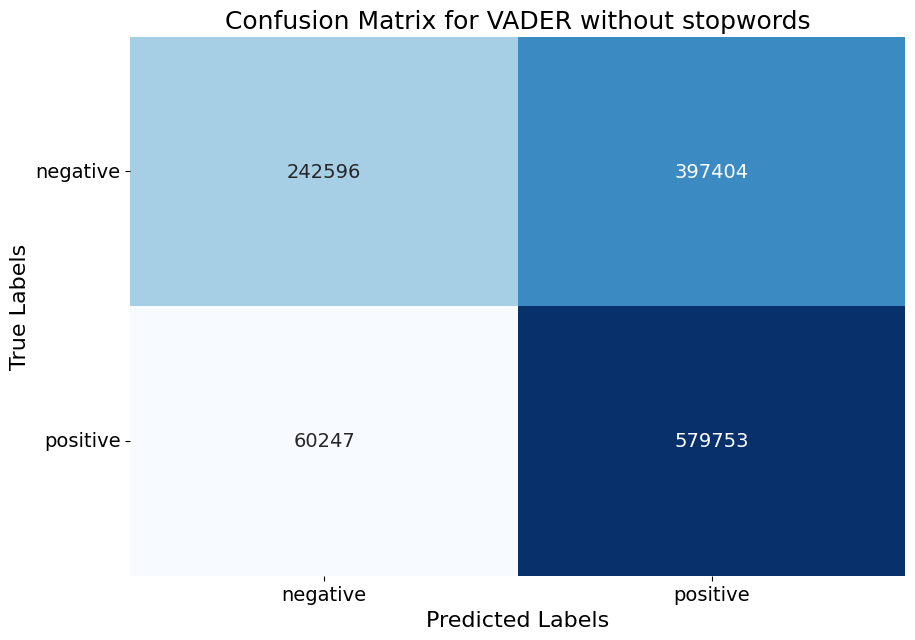

In [39]:
cm_nb = confusion_matrix(df_vader_without_stopwords['Ground_Truth_Label'], df_vader_without_stopwords['VADER_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for VADER without stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()